In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pygco import cut_simple, cut_from_graph
import os
from PIL import Image
import glob
from sklearn import metrics
#import matplotlib as mplt
from matplotlib import cm


In [2]:
def apply_EM(unaries):
    # potts potential
    label_num = unaries.shape[2]
    x = np.argmin(unaries, axis=2)
    pott_potential = -1000 * np.eye(label_num, dtype=np.int32)
    result = cut_simple(unaries, pott_potential)
    return result


In [3]:
def vectorized_result(j,num_label):
    """Return a 5-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((num_label, 1))
    e[int(j)] = 1
    return e

In [4]:
def getCenterLabel(pixel):
    """
    background = black = (0,0,0)
    outside = red = (255,0,0)
    inside = green = (255,255,0)
    lumen = yellow = (0,255,0)
    catheder shadow = blue = (0,0,255)
    artery wall = turquisw = (0,255,255)
    stent = pink = (255,0,255)
    
    input: RGB value of pixel
    output: integer between 1-5 represnting a class described above
    """
    pixel = tuple(pixel)
    rgb2label = {(255,0,0):0, (255,255,0):1, (0,255,0):2, 
                    (0,0,255):3, (0,255,255):4, (255,0,255):5}
    return rgb2label.get(pixel, 6)

In [5]:
cwd_eval = '/Users/jbaldauf/Documents/Tensorflow/OCT-project/Data/first_results/'
img1 = np.asarray(Image.open(cwd_eval + '1Image036_zoom.png'))
height = img1.shape[0]
width = img1.shape[1]
img1 = img1.reshape(-1,3)
num_labels = 7
img1 = [vectorized_result(getCenterLabel(img1[i]),7) for i in xrange(len(img1))]
img1 = np.asarray(img1)
unaries = (img1.reshape(height,width,7)*(-100)).astype(np.int32)


In [64]:
test = apply_EM(unaries)


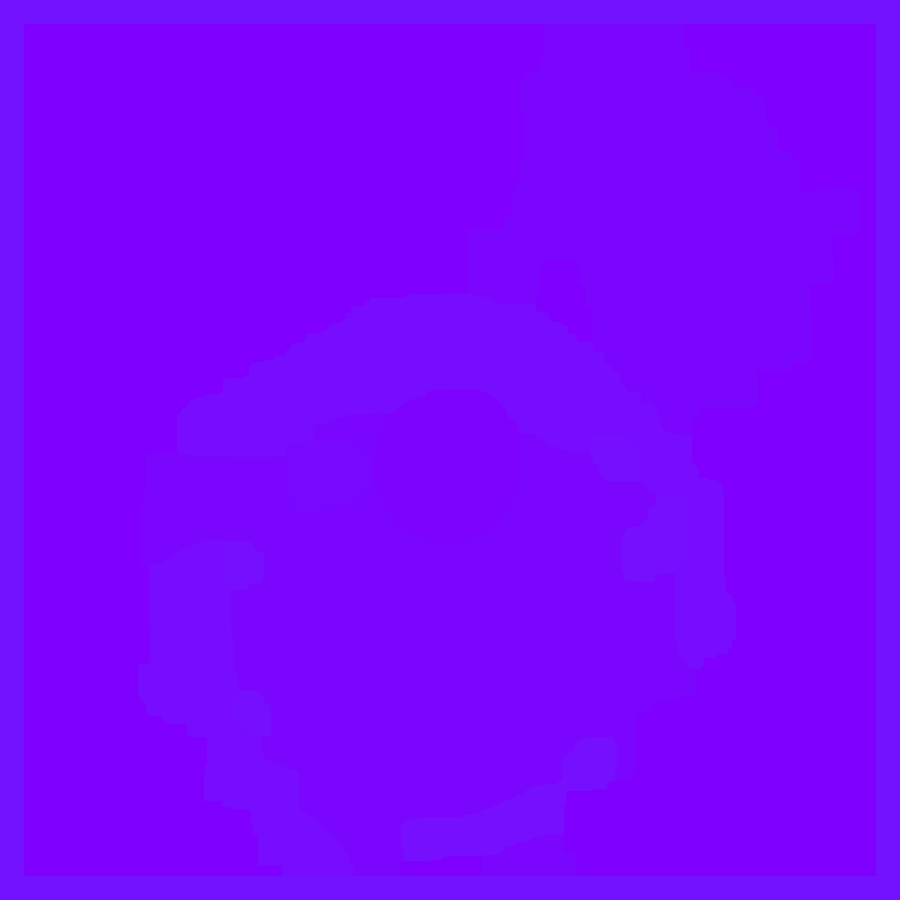

In [65]:
im2 = Image.fromarray(np.uint8(cm.rainbow(test)*255))
im2
